In [56]:
from tensorflow.keras import datasets
import matplotlib.pyplot as plt

In [57]:
(xtrain,ytrain),(xtest,ytest)=datasets.cifar10.load_data()

In [58]:
xtrain.shape[0]

50000

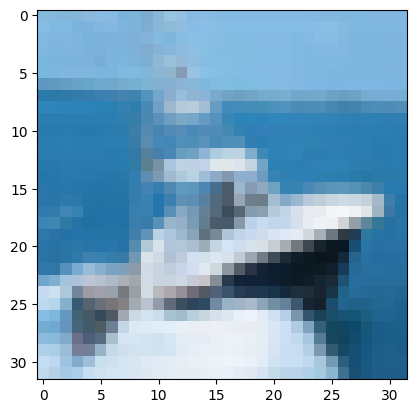

In [59]:
plt.imshow(xtrain[8])

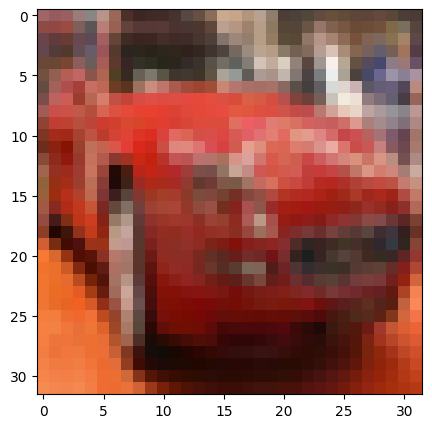

In [60]:
plt.figure(figsize=(15,5))
plt.imshow(xtrain[5])

In [61]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [62]:
ytrain.shape

(50000, 1)

In [63]:
ytrain[:5].ndim
ytrain

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [64]:
ytrains=ytrain.reshape(-1,)

In [65]:
ytrains[:5].ndim
ytrains

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [66]:
ytrain.max()

9

In [67]:
ytrain

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [68]:
xtrain[:5]
xtrain.shape[0]

50000

In [69]:
xtrain=xtrain/255
xtest=xtest/255

In [70]:
from tensorflow.keras.layers import Flatten,Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.models import Sequential
mod=Sequential()


In [71]:
import tensorflow as tf

In [72]:
print(xtrain.shape)


(50000, 32, 32, 3)


In [106]:
mod.add(Flatten(input_shape=(xtrain.shape[1:],)))
mod.add(Dense(units=300,activation='relu'))
mod.add(Dense(units=10,activation='softmax'))

In [107]:
mod.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [109]:
h=mod.fit(xtrain,ytrain,epochs=40,validation_data=(xtest,ytest))

Epoch 1/40
1563/1563 [==============================] - 16s 7ms/step - loss: 1.4045 - accuracy: 0.5216 - val_loss: 1.4228 - val_accuracy: 0.5104
Epoch 2/40
1563/1563 [==============================] - 12s 7ms/step - loss: 1.2901 - accuracy: 0.5501 - val_loss: 1.3638 - val_accuracy: 0.5211
Epoch 3/40
1563/1563 [==============================] - 12s 7ms/step - loss: 1.2743 - accuracy: 0.5544 - val_loss: 1.3639 - val_accuracy: 0.5311
Epoch 4/40
1563/1563 [==============================] - 13s 8ms/step - loss: 1.2716 - accuracy: 0.5545 - val_loss: 1.4303 - val_accuracy: 0.4835
Epoch 5/40
1563/1563 [==============================] - 12s 7ms/step - loss: 1.2702 - accuracy: 0.5566 - val_loss: 1.3776 - val_accuracy: 0.5213
Epoch 6/40
1563/1563 [==============================] - 12s 7ms/step - loss: 1.2729 - accuracy: 0.5530 - val_loss: 1.3360 - val_accuracy: 0.5293
Epoch 7/40
1563/1563 [==============================] - 11s 7ms/step - loss: 1.2699 - accuracy: 0.5548 - val_loss: 1.4583 - val_ac

In [87]:
h.history

{'loss': [1.6443556547164917,
  1.4501043558120728,
  1.4141771793365479,
  1.3943164348602295,
  1.376090168952942,
  1.3726766109466553,
  1.3649126291275024,
  1.3574765920639038,
  1.350394368171692,
  1.3462848663330078,
  1.3453387022018433,
  1.3390076160430908,
  1.3357900381088257,
  1.3328542709350586,
  1.3268346786499023,
  1.3179078102111816,
  1.317565679550171,
  1.3175820112228394,
  1.315567970275879,
  1.3076692819595337,
  1.3075157403945923,
  1.3064026832580566,
  1.3002715110778809,
  1.2993748188018799,
  1.2982399463653564,
  1.2939343452453613,
  1.293580412864685,
  1.292412519454956,
  1.289167881011963,
  1.285140037536621,
  1.2832626104354858,
  1.2851390838623047,
  1.278344988822937,
  1.275748372077942,
  1.278039813041687,
  1.2685794830322266,
  1.2685563564300537,
  1.2656935453414917,
  1.2631434202194214,
  1.262569546699524],
 'accuracy': [0.41609999537467957,
  0.49737998843193054,
  0.5047399997711182,
  0.5125399827957153,
  0.5155799984931946,

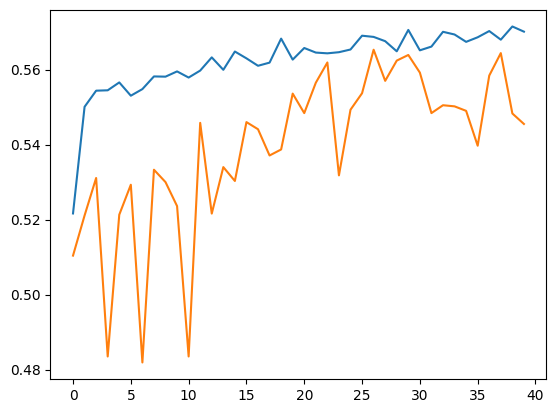

In [110]:
accuracy=h.history['accuracy']
val_accuracy=h.history['val_accuracy']
epoch=h.epoch
plt.plot(epoch,accuracy)
plt.plot(epoch,val_accuracy)

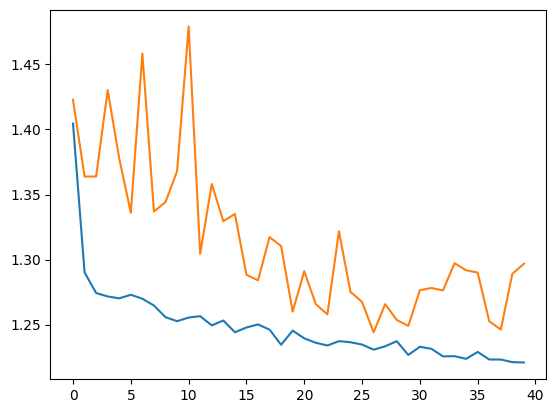

In [111]:
loss=h.history['loss']
val_loss=h.history['val_loss']
plt.plot(epoch,loss)
plt.plot(epoch,val_loss)

In [115]:
k=mod.predict(xtest[:1])

1/1 [==============================] - 0s 39ms/step


In [116]:
import numpy as np

np.argmax(k)

8

In [130]:
from PIL import Image
img='/content/lamborghini-aventador-svj-roadster-sports-car-debut-th-geneva-international-motor-show-switzerland-march-198064869.webp'
img=Image.open(img)
img=img.resize((32,32))
img=np.array(img)/255
im=np.expand_dims(img,axis=0)
m=mod.predict(im)
output=np.argmax(m)

1/1 [==============================] - 0s 18ms/step


In [131]:
classes[output]

'automobile'

In [132]:
mod.save('cifar10model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [133]:
from tensorflow.keras.models import load_model
data=load_model('cifar10model.h5')


In [135]:
from PIL import Image
img='/content/lamborghini-aventador-svj-roadster-sports-car-debut-th-geneva-international-motor-show-switzerland-march-198064869.webp'
img=Image.open(img)
img=img.resize((32,32))
img=np.array(img)/255
im=np.expand_dims(img,axis=0)
m=data.predict(im)
output=np.argmax(m)
classes[output]

1/1 [==============================] - 0s 17ms/step


'automobile'